# Pizza_Price_Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Read The Table

In [2]:
data=pd.read_table("pizza_v1.csv",sep=",")              

# Top 5 Rows of the dataset

In [3]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no,no


company : Name of the companies that sell pizza 
price_rupiah : Target variable also called as dependent variable price of each pizza in rupiah which is currency of indonesia
diameter : The diameter of pizza in each 
topping : Various different toppings that Go on the Pizza
variant	: the varient per kind of Pizza
size : like small, large ,medium,extra large ,XL,jumbo etc..
extra_sauce,extra_cheese,extra_Mashroom : Having 2 Values Yes Or No

# Last 5 Rows of the dataset

In [4]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no,no


# Shape of Dataset

In [5]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of Rows 129
Number of columns 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         129 non-null    object 
 1   price_rupiah    129 non-null    object 
 2   diameter        129 non-null    float64
 3   topping         129 non-null    object 
 4   variant         129 non-null    object 
 5   size            129 non-null    object 
 6   extra_sauce     129 non-null    object 
 7   extra_cheese    129 non-null    object 
 8   extra_Mashroom  129 non-null    object 
dtypes: float64(1), object(8)
memory usage: 9.2+ KB


# Checking null values 

In [7]:
data.isnull().sum()

company           0
price_rupiah      0
diameter          0
topping           0
variant           0
size              0
extra_sauce       0
extra_cheese      0
extra_Mashroom    0
dtype: int64

# Data Preprocessing

In [8]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no,no


rename the column price_rupiah

In [9]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)          

In [10]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no,no


replace Rp and coma(,)

In [11]:
data['price']=data['price'].str.replace("Rp","")
data['price']=data['price'].str.replace(",","").astype('int32')

In [12]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,no


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         129 non-null    object 
 1   price           129 non-null    int32  
 2   diameter        129 non-null    float64
 3   topping         129 non-null    object 
 4   variant         129 non-null    object 
 5   size            129 non-null    object 
 6   extra_sauce     129 non-null    object 
 7   extra_cheese    129 non-null    object 
 8   extra_Mashroom  129 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 8.7+ KB


In [14]:
def convert(value):
   return value*0.0054

In [15]:
data['price']=data['price'].apply(convert)

In [16]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,no


# Data Analysis

# Univariate Analysis

In Univeriate analysis we are taking one Variable at a time it dosen't deal with any relationships

In [17]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_Mashroom'],
      dtype='object')

# Company

In [18]:
data['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

different comanies names A,B,C,D,E
Name of the Companies that sell Pizza

# Price                             

visualization 

In [19]:
import matplotlib.pyplot as plt

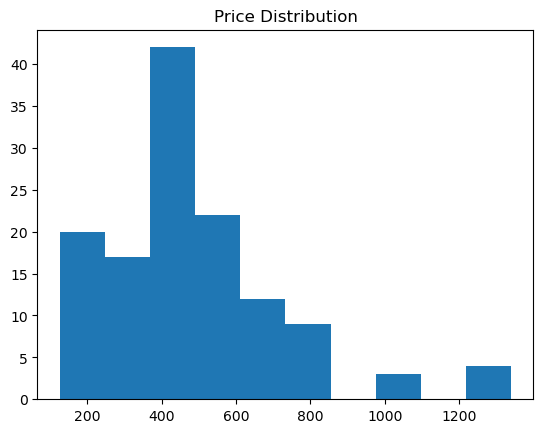

In [20]:
plt.hist(x='price',data=data)
plt.title("Price Distribution")
plt.show()

Most pizza prices are around 400 to 500.

# Daimeter

In [21]:
data['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

for Visualize the Daimeter using Seaborn Library

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='diameter', ylabel='count'>

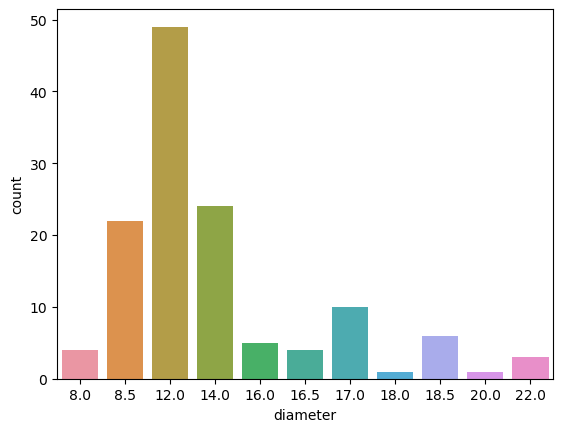

In [23]:
sns.countplot(data['diameter'])

most prefered pizza diameter is 12

# Topping

In [24]:
data['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked beef     19
tuna             9
vegetables       9
meat             8
black papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

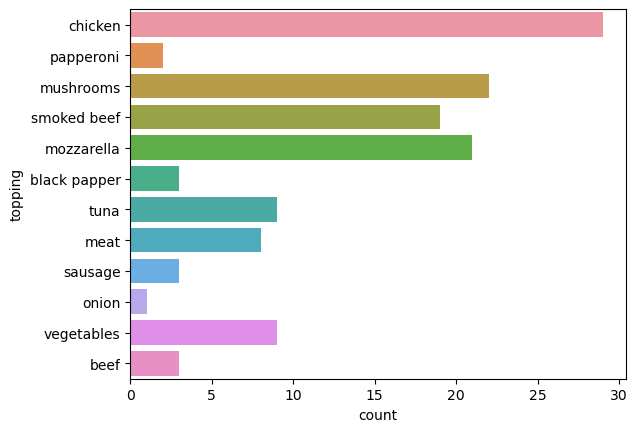

In [25]:
sns.countplot(y=data['topping'])

most popular Toppings among the pizza is Chiken,mushrooms,mozzarella,smoked beef.

In [26]:
data['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

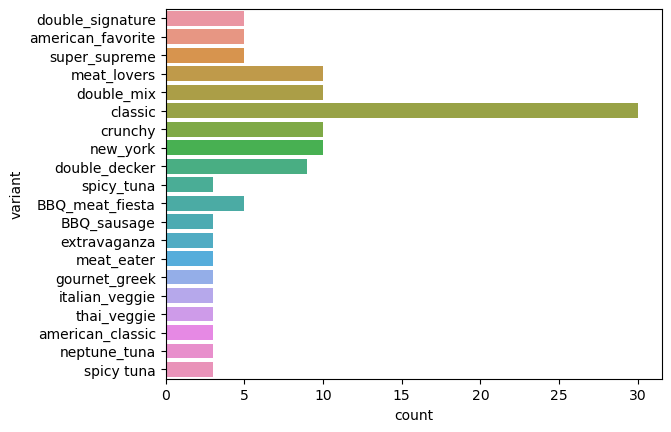

In [27]:
sns.countplot(y=data['variant'])

The most popular variant is classic

# Size

In [28]:
data['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

<AxesSubplot:xlabel='size', ylabel='count'>

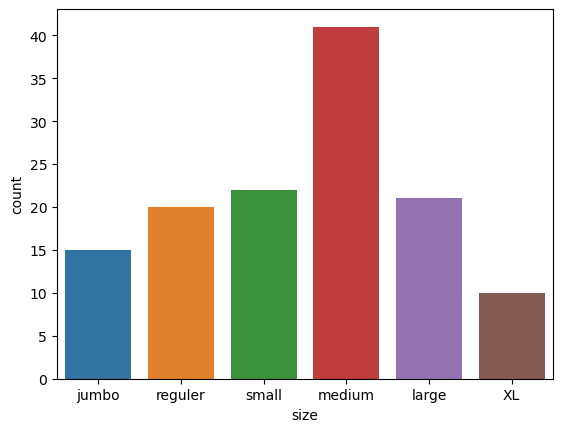

In [29]:
sns.countplot(data['size'])

we can see that most common size of pizza is medium

<AxesSubplot:xlabel='extra_Mashroom', ylabel='count'>

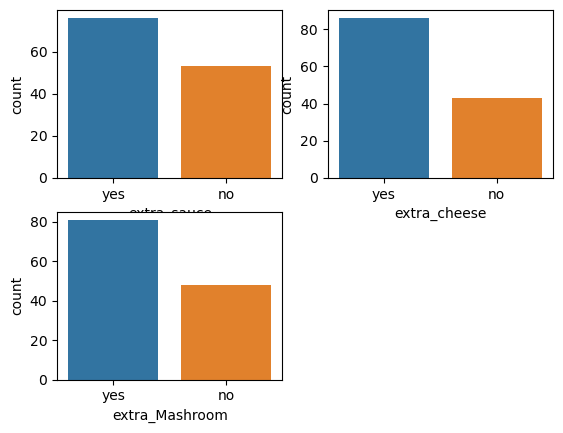

In [30]:
plt.figure(1)
plt.subplot(2,2,1)
sns.countplot(data['extra_sauce'])

plt.subplot(2,2,2)
sns.countplot(data['extra_cheese'])

plt.subplot(2,2,3)
sns.countplot(data['extra_Mashroom'])

on Average most pizza have Extra Toppings Like mashroom, Cheese , sauce in particular the most added toppings is Extra Cheese

# Bivariate Analysis

we can take Two variable at the time and perform the Analysis 
Our most important variable is Price

# Price by Company

In [31]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_Mashroom'],
      dtype='object')

<AxesSubplot:xlabel='company', ylabel='price'>

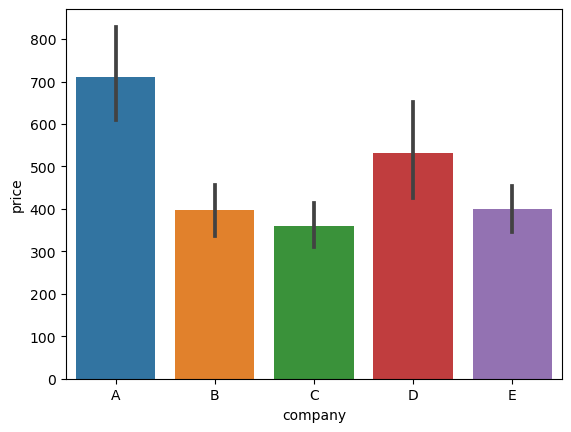

In [32]:
sns.barplot(data['company'],data['price'])

In [33]:
import plotly.express as px

Company A pizza on Average are More Expensive than Others

# Price by topping

In [34]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_Mashroom'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='topping'>

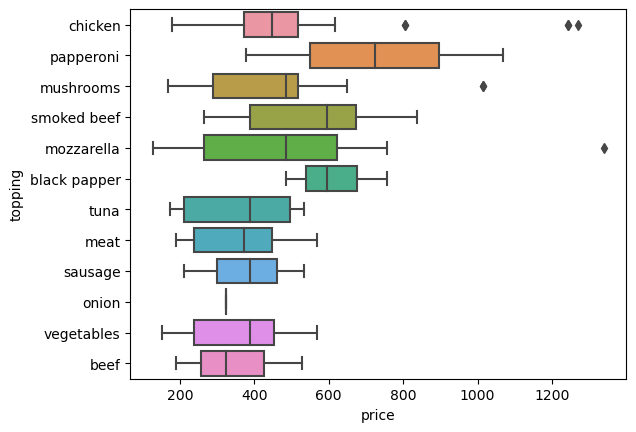

In [35]:
sns.boxplot(y='topping',x='price',data=data)

papperoni pizza on Average are more Expensive than Other pizza
there are some outliers chiken,mushrooms,mozzarella pizza

 # Price by size

<AxesSubplot:xlabel='size', ylabel='price'>

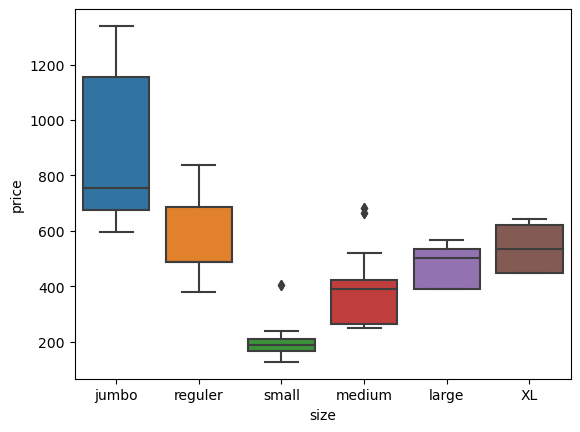

In [36]:
sns.boxplot(x='size',y='price',data=data)

jumbo and reguler pizza since to be more Expensive 
for reguler pizza is cheaper than larger and XL pizza

# Most Expensive pizza

In [37]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_Mashroom'],
      dtype='object')

In [38]:
data['price'].max()       # This is a only price of pizza

1339.2

In [39]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,no


This double_signature Variant of the pizza is the most expensive of pizza as per our dataset

# diameter of jumbo size pizzas

In [40]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_Mashroom'],
      dtype='object')

In [41]:
data[data['size']=='jumbo'] ['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float64

This is Top 5 Rows of diameter of jumbo size pizza

# daimeter of XL size pizzas

In [42]:
data[data['size']=='XL'] ['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float64

This is Top 5 Rows of diameter of XL size pizza

jumbo pizza size should Higher than pizza
we can see size of XL size piza is 17.0 each
In jumbo size pizza 16.0 we are consider as Outlier

# Label Encoding

In [43]:
cat_cols=data.select_dtypes(include=['object']).columns

In [44]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_Mashroom'],
      dtype='object')

In [45]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,yes
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked beef,double_signature,reguler,yes,no,no
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,no


In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [48]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,0,1269.0,22.0,2,8,1,1,1,1
1,0,1069.2,20.0,7,8,1,1,1,1
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,0
4,0,1339.2,18.0,4,8,1,1,0,0


# Store Feature Matrix in X and Target in Y

In [49]:
X=data.drop('price',axis=1)
y=data['price']

# Splitting the dataset into the Training set and testing set

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Import the model

In [51]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,0,1269.0,22.0,2,8,1,1,1,1
1,0,1069.2,20.0,7,8,1,1,1,1
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,0
4,0,1339.2,18.0,4,8,1,1,0,0


In [52]:
!pip install xgboost

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg=XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prediction on test data

In [55]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)

# Evaluating the Algorithm

In [56]:
from sklearn import metrics

In [57]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [58]:
print(score1,score2,score3,score4,score5)

0.7101292654258633 0.02494881304154095 0.8806762283288037 0.9227885744291777 0.9306101998639578


In [59]:
final_data=pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
                        'R2_SCORE':[score1,score2,score3,score4,score5]})

In [60]:
final_data

,Models,R2_SCORE
0,LR,0.710129
1,SVR,0.024949
2,RF,0.880676
3,GB,0.922789
4,XGR,0.930610


In [61]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

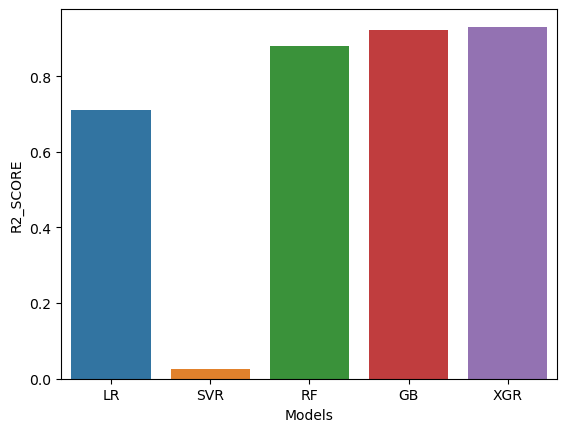

In [62]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

XG BoosterRegressor is the best model for this dataset

# Feature Important

# Random Forest

In [63]:
rf.feature_importances_

array([0.01993917, 0.63441588, 0.0431403 , 0.0981917 , 0.15282693,
       0.02721674, 0.01649649, 0.00777279])

In [64]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)

In [65]:
fea

company           0.019939
diameter          0.634416
topping           0.043140
variant           0.098192
size              0.152827
extra_sauce       0.027217
extra_cheese      0.016496
extra_Mashroom    0.007773
dtype: float64

<AxesSubplot:>

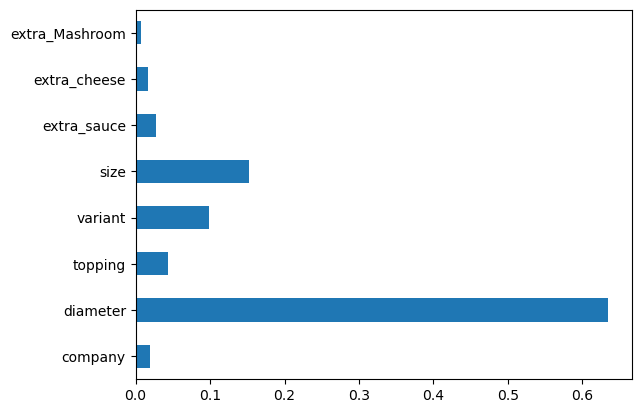

In [66]:
fea.plot(kind='barh')

Random Forest regressor is giving Importance to diameter(0.64)

# Gradient Boosting Regressor

In [67]:
gbr.feature_importances_

array([0.0140724 , 0.67029818, 0.04337057, 0.0954336 , 0.123291  ,
       0.04395323, 0.0069045 , 0.00267652])

In [68]:
fea = pd.Series(gbr.feature_importances_,index=X_train.columns)

<AxesSubplot:>

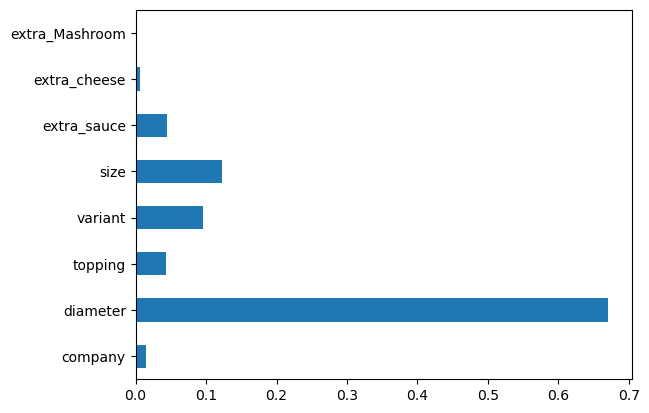

In [69]:
fea.plot(kind='barh')

Gradient Boosting Regressor Also giving importance to diameter

# XGB Regressor

In [70]:
xg.feature_importances_

array([0.00591488, 0.46548802, 0.02081975, 0.04413251, 0.27949888,
       0.13806862, 0.02972881, 0.01634841], dtype=float32)

In [71]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)

<AxesSubplot:>

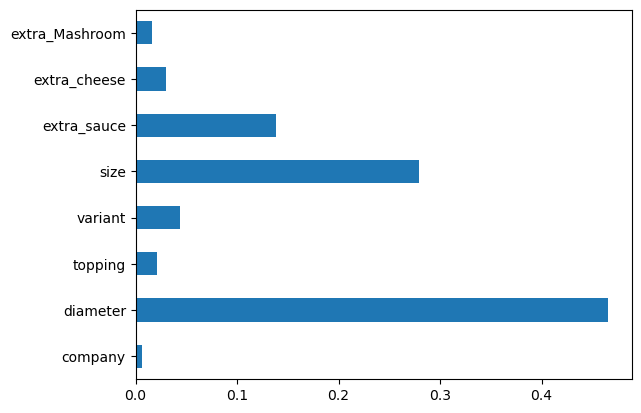

In [72]:
fea.plot(kind='barh')

XGB Regressor is giving impotance diameter and size

# Save the Model

In [73]:
X=data.drop('price',axis=1)
y=data['price']

In [74]:
xgb=XGBRegressor()

In [75]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

best model is XGB Regressor is train on Entire dataset
save this Model

In [76]:
import joblib

In [77]:
joblib.dump(xgb,'pizza_price_predict')                # to save our Model

['pizza_price_predict']

In [78]:
model = joblib.load('pizza_price_predict')

In [79]:
import pandas as pd
df=pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_Mashroom':1
},index=[0])

In [80]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_Mashroom
0,1,22.0,2,8,1,1,1,1


In [81]:
model.predict(df)

array([1249.1562], dtype=float32)